In [1]:
import numpy as np
from sklearn import svm, datasets
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier

%matplotlib inline
import plots as p

## Confusion matrix
Related example: http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

In [2]:
# import some data to play with
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# Run classifier, using a model that is too regularized (C too low) to see
# the impact on the results
classifier = svm.SVC(kernel='linear', C=0.01)
y_pred = classifier.fit(X_train, y_train).predict(X_test)

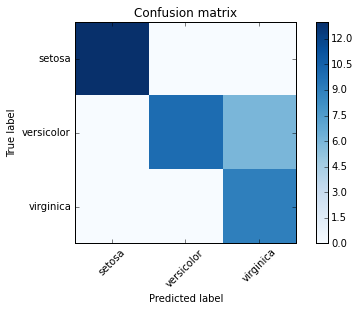

In [3]:
p.plot_confusion_matrix(y_test, y_pred, iris.target_names)

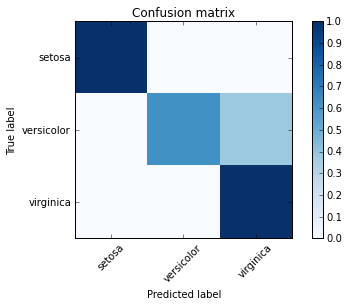

In [4]:
p.plot_confusion_matrix(y_test, y_pred, iris.target_names, normalize=True)

## Receiver operating characteristic (ROC)
Related example: http://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html

In [14]:
# Import some data to play with
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Binarize the output
y = label_binarize(y, classes=[0, 1, 2])
n_classes = y.shape[1]

# Add noisy features to make the problem harder
random_state = np.random.RandomState(0)
n_samples, n_features = X.shape
X = np.c_[X, random_state.randn(n_samples, 200 * n_features)]

# shuffle and split training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.5,
                                                    random_state=0)

# Learn to predict each class against the other
classifier = OneVsRestClassifier(svm.SVC(kernel='linear', probability=True,
                                 random_state=random_state))
y_score = classifier.fit(X_train, y_train).decision_function(X_test)

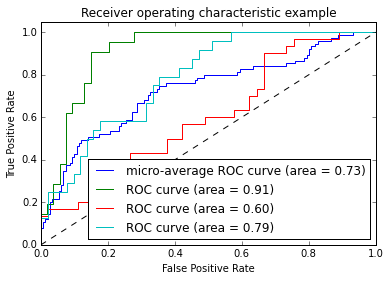

In [15]:
p.plot_roc_curve(y_test, y_score, n_classes=3)

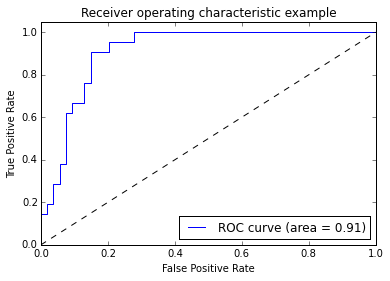

In [16]:
p.plot_roc_curve(y_test[:,0], y_score[:,0], n_classes=2)

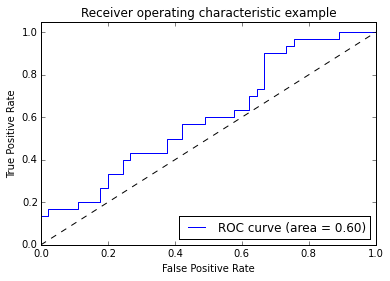

In [17]:
p.plot_roc_curve(y_test[:,1], y_score[:,1], n_classes=2)

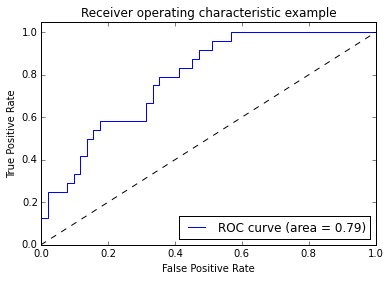

In [18]:
p.plot_roc_curve(y_test[:,2], y_score[:,2], n_classes=2)

## Precision-Recall
Related example: http://scikit-learn.org/stable/auto_examples/model_selection/plot_precision_recall.html

In [28]:
# Import some data to play with
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Binarize the output
y = label_binarize(y, classes=[0, 1, 2])
n_classes = y.shape[1]

# Add noisy features to make the problem harder
random_state = np.random.RandomState(0)
n_samples, n_features = X.shape
X = np.c_[X, random_state.randn(n_samples, 200 * n_features)]

# shuffle and split training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.5,
                                                    random_state=random_state)

# Learn to predict each class against the other
classifier = OneVsRestClassifier(svm.SVC(kernel='linear', probability=True,
                                 random_state=random_state))
y_score = classifier.fit(X_train, y_train).decision_function(X_test)

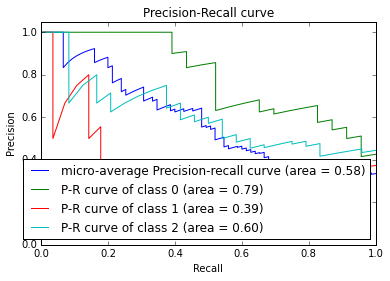

In [29]:
p.plot_precision_recall_curve(y_test, y_score, n_classes=3)

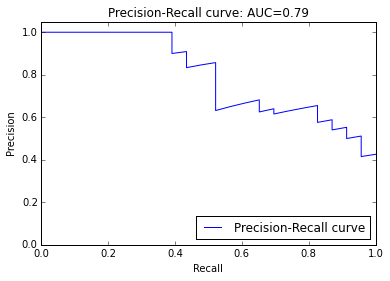

In [30]:
p.plot_precision_recall_curve(y_test[:,0], y_score[:,0], n_classes=2)

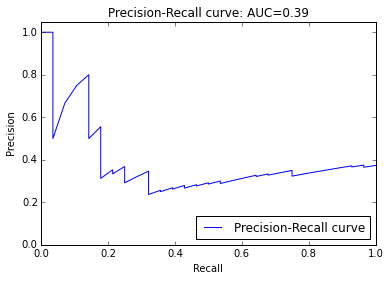

In [31]:
p.plot_precision_recall_curve(y_test[:,1], y_score[:,1], n_classes=2)

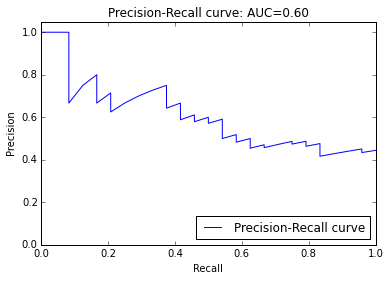

In [32]:
p.plot_precision_recall_curve(y_test[:,2], y_score[:,2], n_classes=2)